In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('london_crime_by_lsoa.csv')


In [3]:
# Membaca 5 data teratas
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [4]:
# membaca 5 data terbawah dari dataset
df.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [6]:
df.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


In [7]:
print('minor_category',df.minor_category.unique())

minor_category ['Burglary in Other Buildings' 'Other violence' 'Personal Property'
 'Other Theft' 'Offensive Weapon' 'Criminal Damage To Other Building'
 'Theft/Taking of Pedal Cycle' 'Motor Vehicle Interference & Tampering'
 'Theft/Taking Of Motor Vehicle' 'Wounding/GBH' 'Other Theft Person'
 'Common Assault' 'Theft From Shops' 'Possession Of Drugs' 'Harassment'
 'Handling Stolen Goods' 'Criminal Damage To Dwelling'
 'Burglary in a Dwelling' 'Criminal Damage To Motor Vehicle'
 'Other Criminal Damage' 'Counted per Victim' 'Going Equipped'
 'Other Fraud & Forgery' 'Assault with Injury' 'Drug Trafficking'
 'Other Drugs' 'Business Property' 'Other Notifiable' 'Other Sexual'
 'Theft From Motor Vehicle' 'Rape' 'Murder']


In [8]:
print('major_category',df.major_category.unique())

major_category ['Burglary' 'Violence Against the Person' 'Robbery' 'Theft and Handling'
 'Criminal Damage' 'Drugs' 'Fraud or Forgery' 'Other Notifiable Offences'
 'Sexual Offences']


In [9]:
print('borough', df.borough.unique())

borough ['Croydon' 'Greenwich' 'Bromley' 'Redbridge' 'Wandsworth' 'Ealing'
 'Hounslow' 'Newham' 'Sutton' 'Haringey' 'Lambeth' 'Richmond upon Thames'
 'Hillingdon' 'Havering' 'Barking and Dagenham' 'Kingston upon Thames'
 'Westminster' 'Hackney' 'Enfield' 'Harrow' 'Lewisham' 'Brent' 'Southwark'
 'Barnet' 'Waltham Forest' 'Camden' 'Bexley' 'Kensington and Chelsea'
 'Islington' 'Tower Hamlets' 'Hammersmith and Fulham' 'Merton'
 'City of London']


In [10]:
print("Cek jika column yang memiliki null values")
print(df.isnull())

Cek jika column yang memiliki null values
          lsoa_code  borough  major_category  minor_category  value   year  \
0             False    False           False           False  False  False   
1             False    False           False           False  False  False   
2             False    False           False           False  False  False   
3             False    False           False           False  False  False   
4             False    False           False           False  False  False   
...             ...      ...             ...             ...    ...    ...   
13490599      False    False           False           False  False  False   
13490600      False    False           False           False  False  False   
13490601      False    False           False           False  False  False   
13490602      False    False           False           False  False  False   
13490603      False    False           False           False  False  False   

          month  
0  

To get the list of column headers we can call upon the dataframe's .columns parameter

In [11]:
df.columns.values

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

Similarly, to get the list of indicies we use the .index parameter.

In [12]:
df.index.values

array([       0,        1,        2, ..., 13490601, 13490602, 13490603],
      dtype=int64)

rename column 'borough' menjadi 'District'

In [13]:
df.rename(columns={'borough':'District'}, inplace=True)
df.head(2)

,lsoa_code,District,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11


To view the dimensions of the dataframe, we use the .shape parameter

In [14]:
df.shape

(13490604, 7)

Let's make one dataset that contains value 1 in value features.

In [15]:
criminal = df[df['value'] == 1]

In [16]:
df1 = df.copy()
df1.drop(['lsoa_code','minor_category'], axis=1, inplace=True) # menghapus kolom yang tidak perlu
df1

,District,major_category,value,year,month
0,Croydon,Burglary,0,2016,11
1,Greenwich,Violence Against the Person,0,2016,11
2,Bromley,Violence Against the Person,0,2015,5
3,Redbridge,Burglary,0,2016,3
4,Wandsworth,Robbery,0,2008,6
...,...,...,...,...,...
13490599,Brent,Criminal Damage,0,2015,2
13490600,Hillingdon,Robbery,1,2015,6
13490601,Sutton,Burglary,0,2011,2
13490602,Croydon,Robbery,0,2011,5


In [17]:
drugs = df1[(df1['major_category'] == 'Drugs') & (df1['year'] == 2016)]
print(drugs.value.sum())

38914


In [18]:
df_sum = df1.groupby(['year','District']).size().reset_index(name='count_per_year')  #groupby
print(df_sum)
print(df_sum.columns)

     year              District  count_per_year
0    2008  Barking and Dagenham           34560
1    2008                Barnet           63648
2    2008                Bexley           42852
3    2008                 Brent           54516
4    2008               Bromley           58212
..    ...                   ...             ...
292  2016                Sutton           35832
293  2016         Tower Hamlets           45792
294  2016        Waltham Forest           45144
295  2016            Wandsworth           55404
296  2016           Westminster           40740

[297 rows x 3 columns]
Index(['year', 'District', 'count_per_year'], dtype='object')


In [19]:
table = df1.pivot_table(values='value', index=['year'],columns=['major_category'], aggfunc=np.sum, fill_value=0)
table

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
year,,,,,,,,,
2008,88092,91872,68804,5325,10112,29627,1273,283692,159844
2009,90619,85565,60549,0,10644,29568,0,279492,160777
2010,86826,77897,58674,0,10768,32341,0,290924,157894
2011,93315,70914,57550,0,10264,36679,0,309292,146901
2012,93392,62158,51776,0,10675,35260,0,334054,150014
2013,87222,56206,50278,0,10811,29337,0,306372,146181
2014,76053,59279,44435,0,13037,22150,0,279880,185349
2015,70489,62976,39785,0,14229,21383,0,284022,218740
2016,68285,64071,38914,0,15809,22528,0,294133,232381


### Visualizing Data using Matplotlib

#### Area Plots

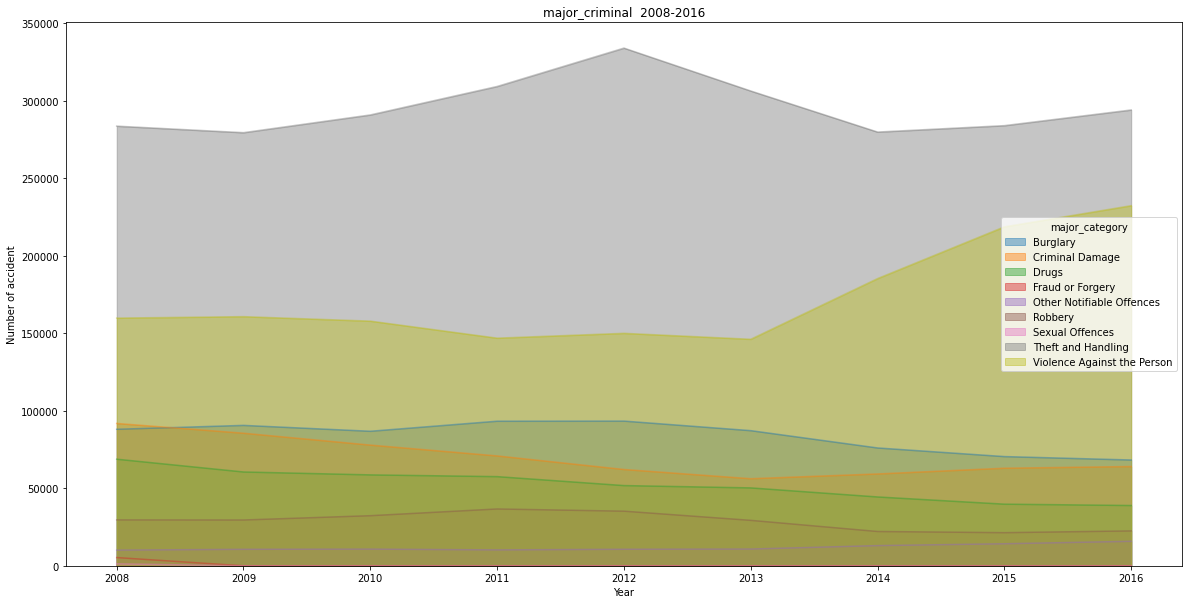

In [20]:
table.plot(kind='area',
alpha=0.45,
stacked=False,
figsize=(20, 10), # pass a tuple (x, y) size
)

plt.title('major_criminal  2008-2016') # Memberi judul
plt.ylabel('Number of accident') # keterangan y-label
plt.xlabel('Year') # keterangan x-label

plt.show()

Dari plot di atas dapat ditari kesimpulan bahwa nilai kasus paling tinggi adalah pada kasus Theft and Handling dan paling rendah adalah Fraud or forgery yang hanya terjadi pada tahun 2008 saja dan sedikit pada 2009

#### Histogram

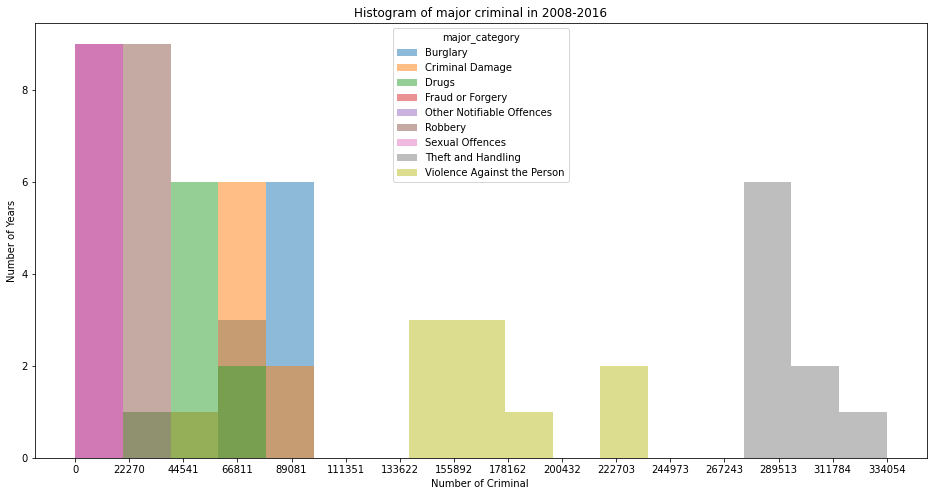

In [21]:
count, bin_edges = np.histogram(table, 15)
table.plot(kind ='hist',
figsize=(16, 8),
bins=17,
alpha=0.5,
xticks=bin_edges,
)

plt.title('Histogrammajor criminal dalam 2008-2016') # memberi judul pada histogram
plt.ylabel('Number of Years') # memberi keterangan pada y-label
plt.xlabel('Number of Criminal ') # memberi keterangan pada x-label

plt.show()

Histogram diatas menunjukan bahwa kasus paling tinggi dan terjadi dalam jangka panjanga dalah kasus sexual Offerences

#### Bar Charts

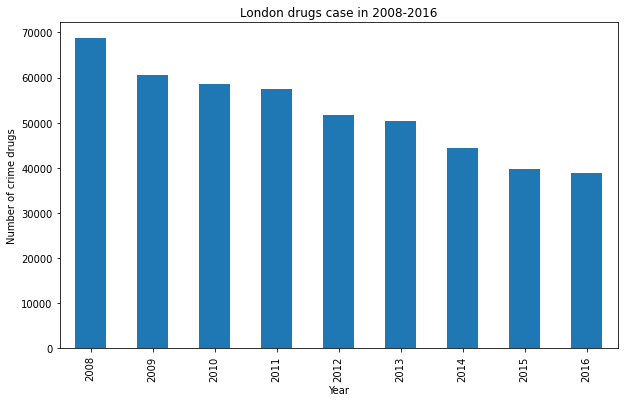

In [22]:
table_bar = table['Drugs']
table_bar.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # keterangan x-label
plt.ylabel('Number of crime drugs') # keterangan Y-label
plt.title('London drugs case in 2008-2016') # Judul plot

plt.show()

Chart diatas menunjukan kasus Drugs di london dari tahun 2008 sampai 2016, kasus paling tinggi terjadi pada tahun 2008 dan paling rendah 2016. Dapat dilihat bahwa trend kasus setiap tahun terus menurun

#### Pie Charts

In [23]:
table_pie = table.transpose()
table_pie['total'] = table.sum()
table_pie

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,total
major_category,,,,,,,,,,
Burglary,88092,90619,86826,93315,93392,87222,76053,70489,68285,754293
Criminal Damage,91872,85565,77897,70914,62158,56206,59279,62976,64071,630938
Drugs,68804,60549,58674,57550,51776,50278,44435,39785,38914,470765
Fraud or Forgery,5325,0,0,0,0,0,0,0,0,5325
Other Notifiable Offences,10112,10644,10768,10264,10675,10811,13037,14229,15809,106349
Robbery,29627,29568,32341,36679,35260,29337,22150,21383,22528,258873
Sexual Offences,1273,0,0,0,0,0,0,0,0,1273
Theft and Handling,283692,279492,290924,309292,334054,306372,279880,284022,294133,2661861
Violence Against the Person,159844,160777,157894,146901,150014,146181,185349,218740,232381,1558081


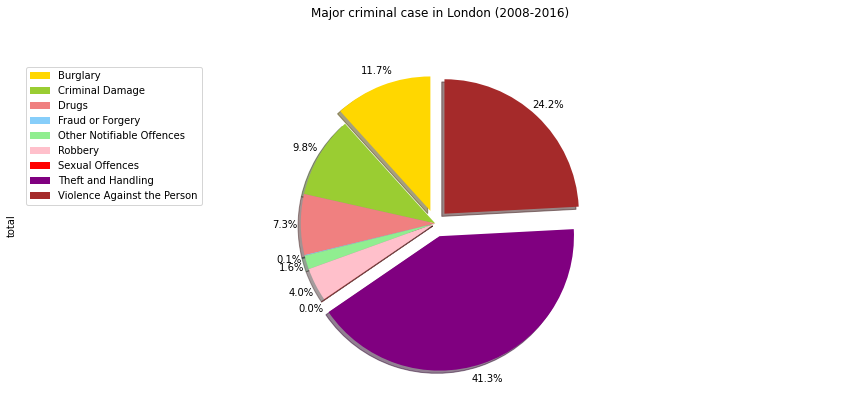

In [24]:

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink','red','purple','brown']
explode_list = [0.1, 0, 0, 0, 0, 0, 0, 0.1, 0.1]

table_pie['total'].plot(kind='pie',
figsize=(15, 6), #Ukuran Gambar
autopct='%1.1f%%',
startangle=90,
shadow=True,
labels=None, # turn off labels on pie chart
colors=colors_list, # add custom colors

pctdistance=1.12,
explode=explode_list #explode
)

plt.title('Major criminal case in London (2008-2016)', y=1.12)  #Judul Plot

plt.axis('equal')

# add legend
plt.legend(labels=table_pie.index, loc='upper left')

plt.show()

Berdasarkan Pie chart diatas nilai persentase paling tinggi adalah pada kasus Theft and handling sebesar 41.3% dan yang paling rendah adalah kasus Fraud or forgery sebesar 0.1 %

#### Box Plots

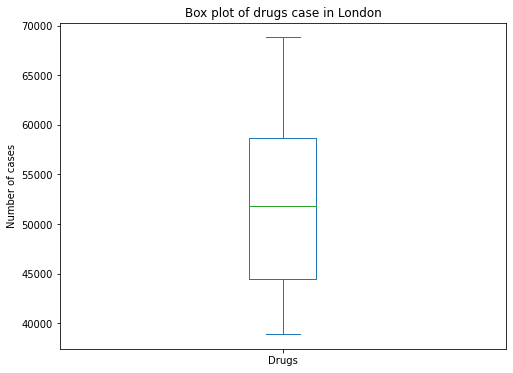

In [39]:
table_bar.plot(kind='box', figsize=(8, 6))   #plot box dan ukuran image
plt.title('Box plot of drugs case in London')  # judul pada plot
plt.ylabel('Number of cases') #judul pada ylabel

plt.show()

#### Scatter Plots

no of crime in each month in the year 2016
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
[58847 56697 59167 58637 63990 62262 65519 62666 61412 63405 61064 62455]


(array([56000., 58000., 60000., 62000., 64000., 66000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

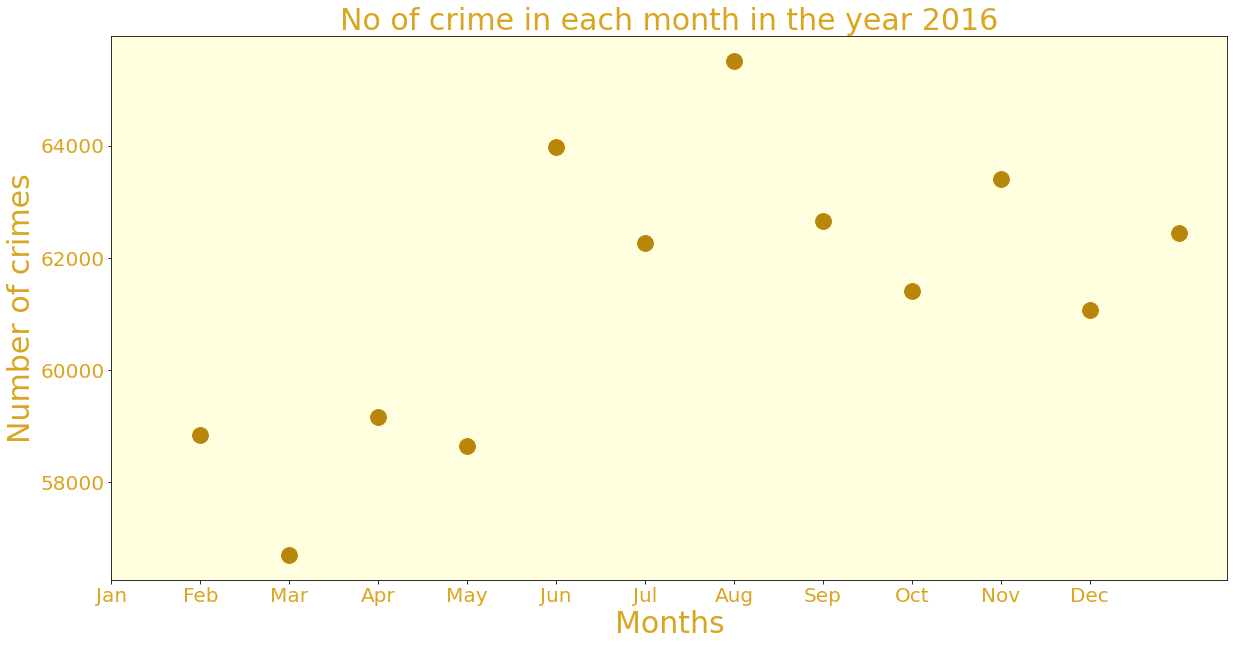

In [38]:
year2016=df.loc[df['year'] == 2016]

months=year2016['month'].unique()

months.sort()

sum_month=year2016.groupby(['month']).sum()

Values=sum_month['value'].to_numpy()
name_of_months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
print("no of crime in each month in the year 2016")
print(name_of_months)
print(Values)
n1 = np.arange(len(months))
xrange=range(1,13)
    
plt.figure(figsize=(20,10))
ax = plt.axes()
ax.set_facecolor("lightyellow")
plt.scatter(xrange,Values,s=250,color='darkgoldenrod',cmap='viridis',alpha=1)
plt.title("No of crime in each month in the year 2016", fontsize = 30,color='goldenrod')
plt.xlabel('Months',fontsize=30,color='goldenrod')
plt.ylabel('Number of crimes',fontsize=30,color='goldenrod')
plt.xticks(n1,name_of_months)
plt.xticks(color='goldenrod',fontsize=20)
plt.yticks(color='goldenrod',fontsize=20)

Plot diatas menunjukan sebasaran kasus sepanjang 2016

#### Word Clouds

In [32]:
pip install WordCloud   # install wordcloud

  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for WordCloud, since package 'wheel' is not installed.
  Running setup.py install for WordCloud: started
  Running setup.py install for WordCloud: finished with status 'error'



  error: subprocess-exited-with-error
  
  × Running setup.py install for WordCloud did not run successfully.
  │ exit code: 1
  ╰─> [20 lines of output]
      running install
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-3.10
      creating build\lib.win-amd64-3.10\wordcloud
      copying wordcloud\color_from_image.py -> build\lib.win-amd64-3.10\wordcloud
      copying wordcloud\tokenization.py -> build\lib.win-amd64-3.10\wordcloud
      copying wordcloud\wordcloud.py -> build\lib.win-amd64-3.10\wordcloud
      copying wordcloud\wordcloud_cli.py -> build\lib.win-amd64-3.10\wordcloud
      copying wordcloud\_version.py -> build\lib.win-amd64-3.10\wordcloud
      copying wordcloud\__init__.py -> build\lib.win-amd64-3.10\wordcloud
      copying wordcloud\__main__.py -> build\lib.win-amd64-3.10\wordcloud
      copying wordcloud\stopwords -> build\lib.win-amd64-3.10\wordcloud
      copying wordcloud\DroidSansMono.ttf -> build\lib.win-amd

In [33]:
# import package
from wordcloud import WordCloud, STOPWORDS

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
stopwords = set(STOPWORDS)

In [ ]:
source_dataset = ' '.join(df.major_category)

In [ ]:
your_wordcloud = WordCloud(
background_color='white',
max_words=2000,
stopwords=stopwords
)

# generate the word cloud
your_wordcloud.generate(source_dataset)

In [ ]:
plt.imshow(your_wordcloud, interpolation='bilinear')
# Graded-Funtion End

plt.axis('off')
plt.show()

In [ ]:
pip install folium

In [ ]:
import folium

In [ ]:

df2=df[['District','value']]
world_geo = r'https://raw.githubusercontent.com/radoi90/housequest-data/master/london_boroughs.geojson' 
world_map=folium.Map(location=[54.237933,-2.36967],zoom_start=5,tiles = 'Mapbox Bright')

world_map.choropleth(
    geo_data=world_geo,
    name='choropleth',
    data=df2,
    columns=['District', 'value'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime rate in boroughs of london'
    
)

#folium.LayerControl().add_to(world_map)
world_map.save('LondonCrime.html')
display(world_map)

Plot diatas menunjukan sebasaran kasus berdasarkan wilayah district di kota london

### Kesimpulan

Dari kasus kejahatan di london dari tahun 2008 sampai 2016 kasus paling tinggi adalah kasus Theft and handling, dimana dari keseluruhan kasus yang ada, Theft and handling menyumbang sebesar 41,3%, sedangkan kasus yang paling rendah adalah kasus fraud or forgery sebesar 0.1% saja, itu pun terjadi hanya pada tahun 2008 saja